In [ ]:
%load_ext autoreload
%autoreload 2
import sys

import numpy as np
import plotly.express as px
import plotly.graph_objects as go

sys.path.append("../")

from equation_discover import *

In [6]:
def train_test_split(X, y, test_size: float = 0.2):
    n = X.shape[0]
    test_index = np.random.choice(range(n), replace=False, size=int(test_size * n))
    train_index = [i for i in range(n) if i not in test_index]
    return X[train_index], y[train_index], X[test_index], y[test_index]

In [8]:
X, y = generate_gaussian_problem(1000)

In [9]:
X_train, y_train, X_test, y_test = train_test_split(X, y, 0.2)

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

In [14]:
model = ProxyModel([128, 128, 128, 128], "relu")

In [28]:
model.fit(X_train, y_train, batch_size=500, epochs=1000, validation_split=0.2)

Epoch 1/1000
2/2 [==============================] - 0s 69ms/step - loss: 2.3098e-05 - val_loss: 4.6103e-05
Epoch 2/1000
2/2 [==============================] - 0s 23ms/step - loss: 2.8451e-05 - val_loss: 4.3671e-05
Epoch 3/1000
2/2 [==============================] - 0s 30ms/step - loss: 1.8581e-05 - val_loss: 9.1475e-05
Epoch 4/1000
2/2 [==============================] - 0s 27ms/step - loss: 6.5113e-05 - val_loss: 4.0939e-05
Epoch 5/1000
2/2 [==============================] - 0s 29ms/step - loss: 2.1959e-05 - val_loss: 9.2285e-05
Epoch 6/1000
2/2 [==============================] - 0s 23ms/step - loss: 5.6464e-05 - val_loss: 5.8699e-05
Epoch 7/1000
2/2 [==============================] - 0s 27ms/step - loss: 2.9841e-05 - val_loss: 3.7489e-05
Epoch 8/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.9504e-05 - val_loss: 6.8143e-05
Epoch 9/1000
2/2 [==============================] - 0s 26ms/step - loss: 4.0995e-05 - val_loss: 6.5795e-05
Epoch 10/1000
2/2 [==================

In [16]:
nn_rmse = model.rmse(X_test, y_test)

In [17]:
def bootstrap(X, y, n: int, func):
    errors = []
    for _ in range(100):
        index = np.random.choice(range(X.shape[0]), size=X.shape[0])
        errors.append(func(X[index], y[index]))
    return np.array(errors)

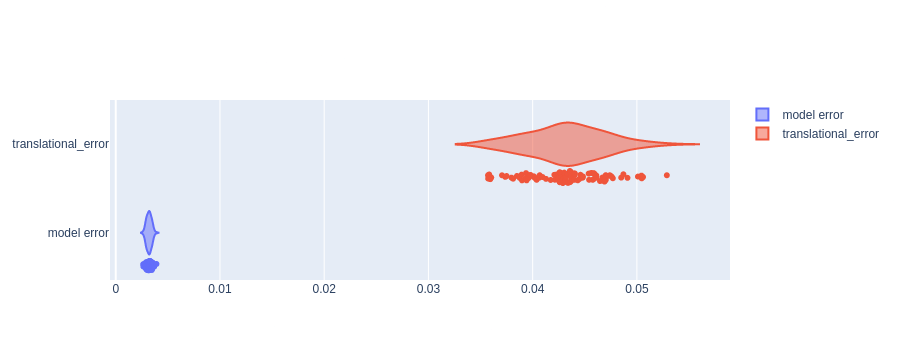

In [31]:
func = lambda X, y: model.translational_error(X, 0, 1)
go.Figure(
    [
        go.Violin(
            x=bootstrap(X_test, y_test, 50, func=model.rmse),
            name="model error",
            points="all",
        ),
        go.Violin(
            x=bootstrap(X_test, y_test, 50, func),
            name="translational_error",
            points="all",
        ),
    ]
)

In [24]:
from itertools import combinations, product

In [25]:
for i, j in combinations(range(3), r=2):
    print(i, j, model.translational_error(X, i, j) < 7 * nn_rmse)

0 1 False
0 2 False
1 2 False


32/32 [==============================] - 0s 1ms/step


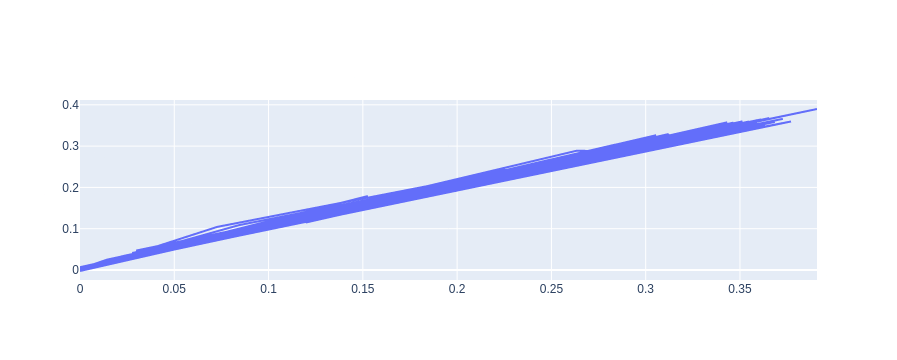

In [27]:
go.Figure(go.Scatter(x=y, y=model.predict(X)))

2/2 [==============================] - 0s 2ms/step


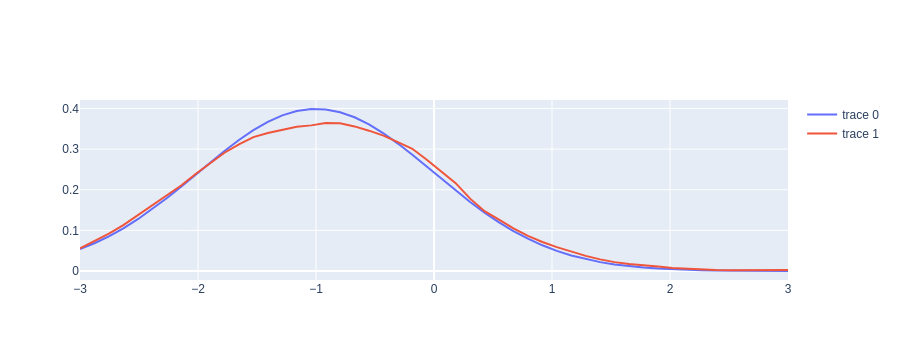

In [16]:
x = np.linspace(-3, 3)
mu = -1
sigma = 1

X_pred = np.empty((50, 3))
X_pred[:, 0] = x
X_pred[:, 1] = mu
X_pred[:, 2] = sigma

go.Figure(
    [
        go.Scatter(x=x, y=gaussian(x, mu, sigma)),
        go.Scatter(x=x, y=model.predict(X_pred)),
    ]
)